 ### 1. Data exploration and Data Cleaning

In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
pd.set_option('display.max_columns', 1000) # shows all the columns
pd.set_option('display.float_format', lambda x: '%.4f' % x) # displays outputs with 1 decimal
pd.set_option('display.max_rows', 10000) # shows all the rows
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as mtick
from mizani.formatters import percent_format

# Basic exploration of the entire dataset

Here , I perform some basic exploration of the Telecom Churn dataset to understand the data and also the trend of the features

In [129]:
# importing the data
data=pd.read_excel('Telco_customer_churn_3.xlsx')
#Viewing first 5 rows of the dataset
data.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.8500,108.1500,Yes,1
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7000,151.6500,Yes,1
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.6500,820.5000,Yes,1
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8000,3046.0500,Yes,1
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.7000,5036.3000,Yes,1


In [130]:
data.shape

(7043, 21)

The data has 7043 observations and 21 columns. Looking at above table, we see that Total Charges is shown as an object, however that is a numerical column.

Let's get a quick description of the data using the info() method.

Out of 21 variables : there is 17 is categorical variable(object) and rest 4 are numerical (int/float)

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   object 
 1   Senior Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless Billing  7043 non-null   object 
 16  Payment Method     7043 

Let's correct the 'Total Charges' feature by converting that to numerical

In [132]:
data['Total Charges']=data['Total Charges'].replace(' ', np.NaN)
data['Total Charges']=data['Total Charges'].astype('int',errors='ignore')

### Checking if any missing values?
Missing values can be a problem for linear models so checking if any columns have any missing values. If there are, those can be resolved during data cleaning .

Let's see what percentage of missing values are there for these columns

In [133]:
(data.isna().sum())/len(data)*100

Gender              0.0000
Senior Citizen      0.0000
Partner             0.0000
Dependents          0.0000
Tenure Months       0.0000
Phone Service       0.0000
Multiple Lines      0.0000
Internet Service    0.0000
Online Security     0.0000
Online Backup       0.0000
Device Protection   0.0000
Tech Support        0.0000
Streaming TV        0.0000
Streaming Movies    0.0000
Contract            0.0000
Paperless Billing   0.0000
Payment Method      0.0000
Monthly Charges     0.0000
Total Charges       0.1562
Churn Label         0.0000
Churn Value         0.0000
dtype: float64

Feature ' Total Charges' have less than 1% missing. We can resolve these during data cleaning.

# Distribution of the target : Churn Value/Churn Label

Let's see the distribution of the Churn feature.

The pie shows 73.5% of the customer did not leave the company

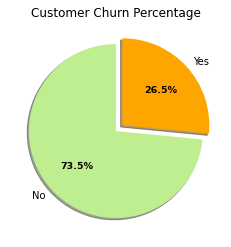

In [134]:
sizes = data['Churn Label'].value_counts()
labels = ["No", "Yes"]
explode = (0, 0.1,)
colors=['#bfee90','orange']

fig1, ax1 = plt.subplots()

_, _, autopcts = ax1.pie(sizes,  explode=explode, labels=labels,  autopct='%1.1f%%',shadow=True, startangle=90,colors=colors,
#         wedgeprops={'edgecolor':'black'}
                        )
plt.setp(autopcts, **{'weight':'bold', 'fontsize':9.5})
plt.title('Customer Churn Percentage') ;

# Data Exploration and Cleaning
## Numerical Variables

Following table shows a description of the numerical variables where on a quick glance we see the min and max values of the numerical features and also their average value. Let's explore further by visualizing and pairing the numerical variables with Churn and see what data insights we can derive.

In [135]:
data.describe()

,Tenure Months,Monthly Charges,Total Charges,Churn Value
count,7043.0000,7043.0000,7032.0000,7043.0000
mean,32.3711,64.7617,2283.3004,0.2654
std,24.5595,30.0900,2266.7714,0.4416
min,0.0000,18.2500,18.8000,0.0000
25%,9.0000,35.5000,401.4500,0.0000
50%,29.0000,70.3500,1397.4750,0.0000
75%,55.0000,89.8500,3794.7375,1.0000
max,72.0000,118.7500,8684.8000,1.0000


We see, few records of 'Tenure Months' is just zero. However a customer should have the data for many months he is part of the business. Let's fill the zero'es with NaN and then check the missing %.

In [136]:
data['Tenure Months']=data['Tenure Months'].replace(0, np.NaN)
(data.isna().sum())/len(data)*100

Gender              0.0000
Senior Citizen      0.0000
Partner             0.0000
Dependents          0.0000
Tenure Months       0.1562
Phone Service       0.0000
Multiple Lines      0.0000
Internet Service    0.0000
Online Security     0.0000
Online Backup       0.0000
Device Protection   0.0000
Tech Support        0.0000
Streaming TV        0.0000
Streaming Movies    0.0000
Contract            0.0000
Paperless Billing   0.0000
Payment Method      0.0000
Monthly Charges     0.0000
Total Charges       0.1562
Churn Label         0.0000
Churn Value         0.0000
dtype: float64

We see, the % of missing tenure is same for Total Charges. We can impute the missing tenure and then multiply 'Monthly Charge by Tenure Months' to fill for missing 'Total Charges'

## Univariate Distribution & Outlier Detection ( Numerical features)

There are **3 numerical features** Tenure of the customer, the monthly and total charges spent on availing services

On first glance, we can see that there are no outliers.

**Tenure Months**- Maximum # of customers have a range of tenure within 10-55 months i.e: 1-5 years

**Monthly charges** - Maximum customer spent between USD 35- USD 90 per month, with the median falling at around $70

**Total Charges**- The median lies around 1500 USD. More the # of tenure months, higher is the Total Charge. There are few customers with USD 8000-USD 9000 total charge

In [137]:
num_cols=['Tenure Months', 'Monthly Charges','Total Charges']

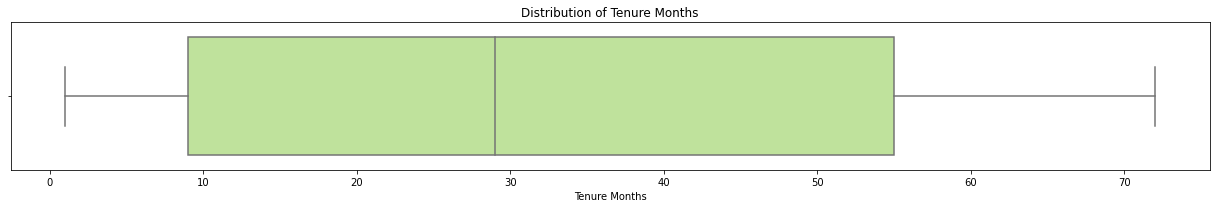

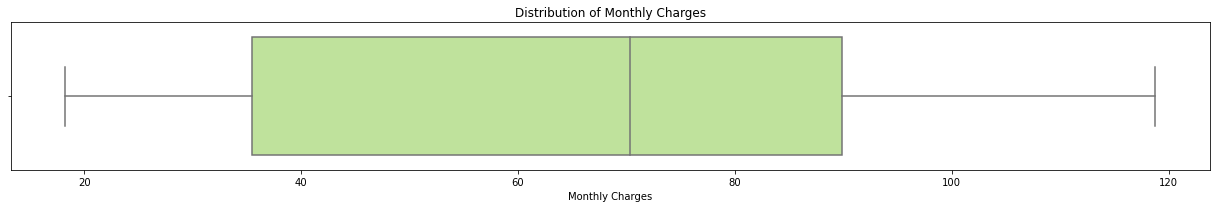

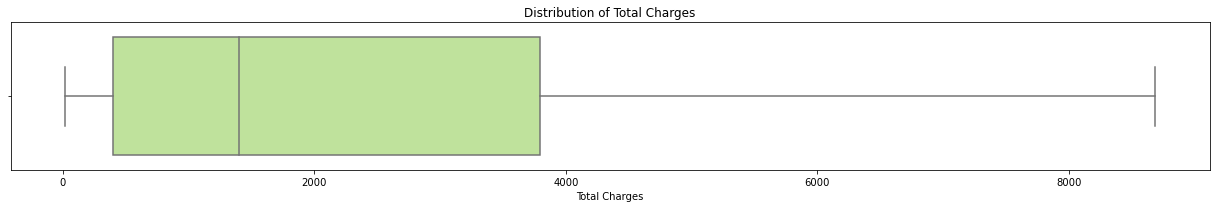

In [138]:
for i in num_cols:
    fig, ax = plt.subplots(figsize=(17,3))
    plt.title("Distribution of {}".format(i))
    sns.boxplot(x=i,data=data,color='#bfee90');
    plt.tight_layout()

Let's impute the missing Tenure with its median and then populate the rest of the missing values for 'Total Charges'.

In [139]:
data['Tenure Months1']=data['Tenure Months'].fillna(data['Tenure Months'].median())
data['Tenure Months']=data['Tenure Months1']
data.drop('Tenure Months1',axis=1, inplace=True)
data['Total Charges']=data['Total Charges'].fillna(data['Monthly Charges']*data['Tenure Months'].median())

## Bivariate Distribution

### How churn is related to the numerical feautures  Tenure, Monthly charges and Total Charges

- **Tenure and Churning**- A large proportion of the customers either have a very short duration (< 3 months) or a quite long duration ( >5 years).
Churning customers have much lower tenure with a median of 10 months compared to a median of 38 months for non churners. Business can pay attention to customers who are about to complete 10 months


- **Monthly Charges and Churning**- Majority of the Churning customers have higher monthly charges with a median of 80 USD. For non-churners, it is within $60. Business can keep a tab on the customers who are paying higher monthly charge and promote special bundle offers helping them curb these charges


- **Total Charges and Churning**=  TotalCharges are proportionate to tenure and MonthlyCharges. A greater proportion of customers lie near the lower range of the distribution

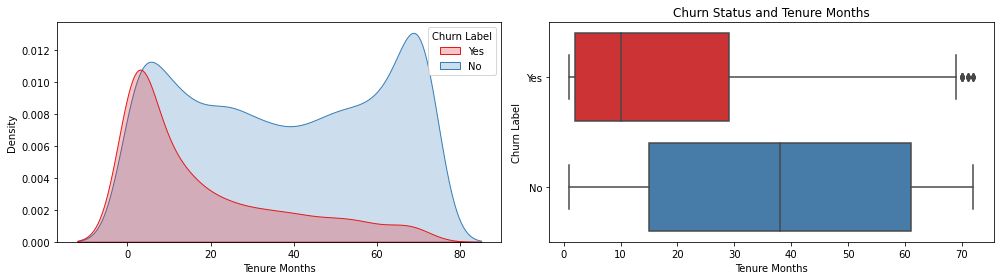

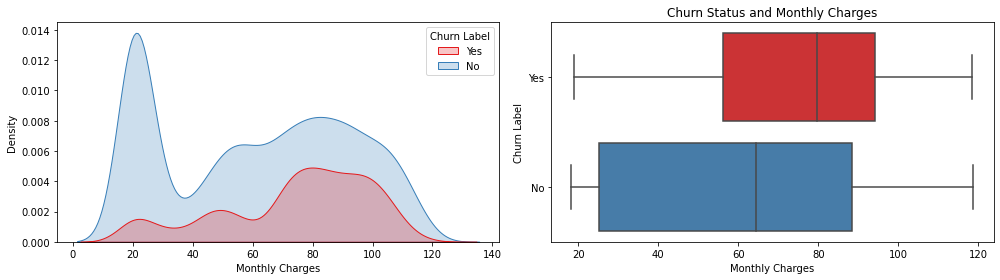

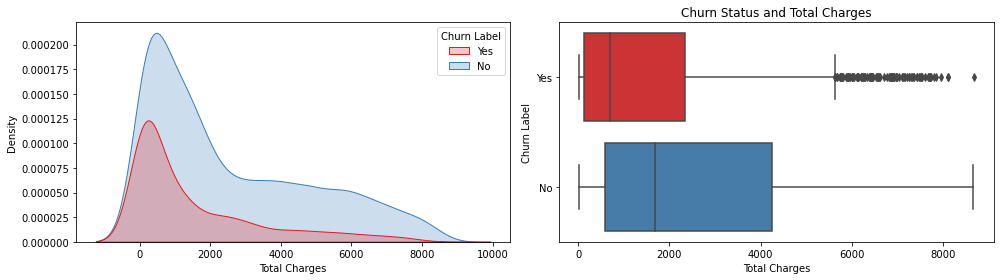

In [140]:
for i in num_cols:
    
    fig, ax =plt.subplots(1,2,figsize=(14,4))
    plt.title("Churn Status and {}".format(i))
    
#     sns.set_palette("Dark2")
#     colors=['green','orange']
    sns.kdeplot(x=i, hue='Churn Label', data=data, shade=True,ax=ax[0],palette='Set1');
    

    plt.title("Churn Status and {}".format(i))
#     sns.set_palette("RdBu")
    sns.boxplot(x=i, y='Churn Label',data=data,ax=ax[1],palette='Set1');
    plt.tight_layout();

### Deep dive into tenure

We see that about 60% of churning happens in the 1st month of the customer. and post 5 months this becomes stable and cut down to just 35%. 

There can be multiple reasons for this. Perhaps the joining offers given to a customer is just given for the first month and after that connection price becomes so high that customer tends to leave. In this case business can increase the duration of the  joining offer at least for 3-6 months and monitor the customer's usage and based on that offer them special offers.

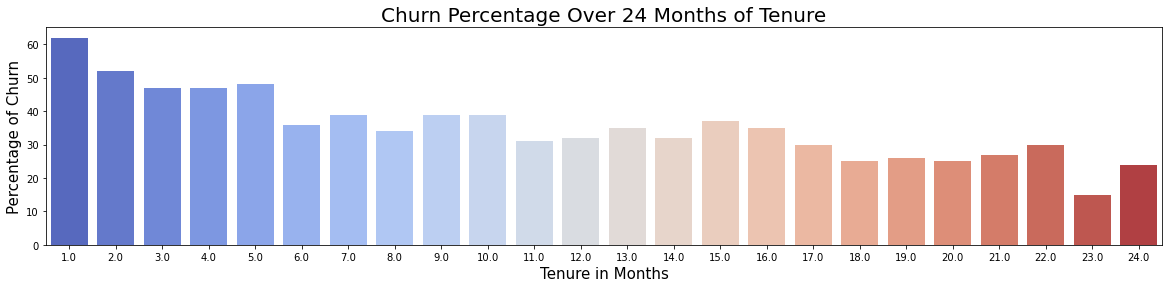

In [141]:
agg = data.replace('Yes', 1).replace('No', 0).groupby('Tenure Months', as_index=False)[['Churn Value']].mean()
agg = agg[agg['Tenure Months'] < 25]
agg['Churn'] = np.round(agg['Churn Value'], 2) * 100

plt.figure(figsize=(20,4))

ax = sns.barplot(x='Tenure Months', y='Churn', data = agg,palette='coolwarm')
ax.set_title('Churn Percentage Over 24 Months of Tenure', fontsize=20)
ax.set_ylabel('Percentage of Churn', fontsize = 15)
ax.set_xlabel('Tenure in Months', fontsize = 15);

## Exploration of Categorical variables

The exploration of various categorical features provides good insights.
Let's start by exploring the unique values each of these variables have and which levels for each of them are the most frequent. To do this, let's create a list of these features and create a temporary dataframe where we assign them as an object variable.

In [142]:
categorical_vars=['Gender','Senior Citizen', 'Partner', 'Dependents', 'Phone Service','Multiple Lines',
                  'Internet Service', 'Online Security','Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
                   'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']
data[categorical_vars].describe()

,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,3555,5901,3641,5416,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


### Demographic features -'Gender','Senior Citizen', 'Partner', 'Dependents'

**Gender,Partner** - We see there is a fairly even split of male and female customers and also in terms of whther there is a partner or not

**Senior Citizen,Dependents**- A minority of the customer database are seniour citizens and similar distribution is seen in terms of having dependents


Text(0, 0.5, '% of Customers')

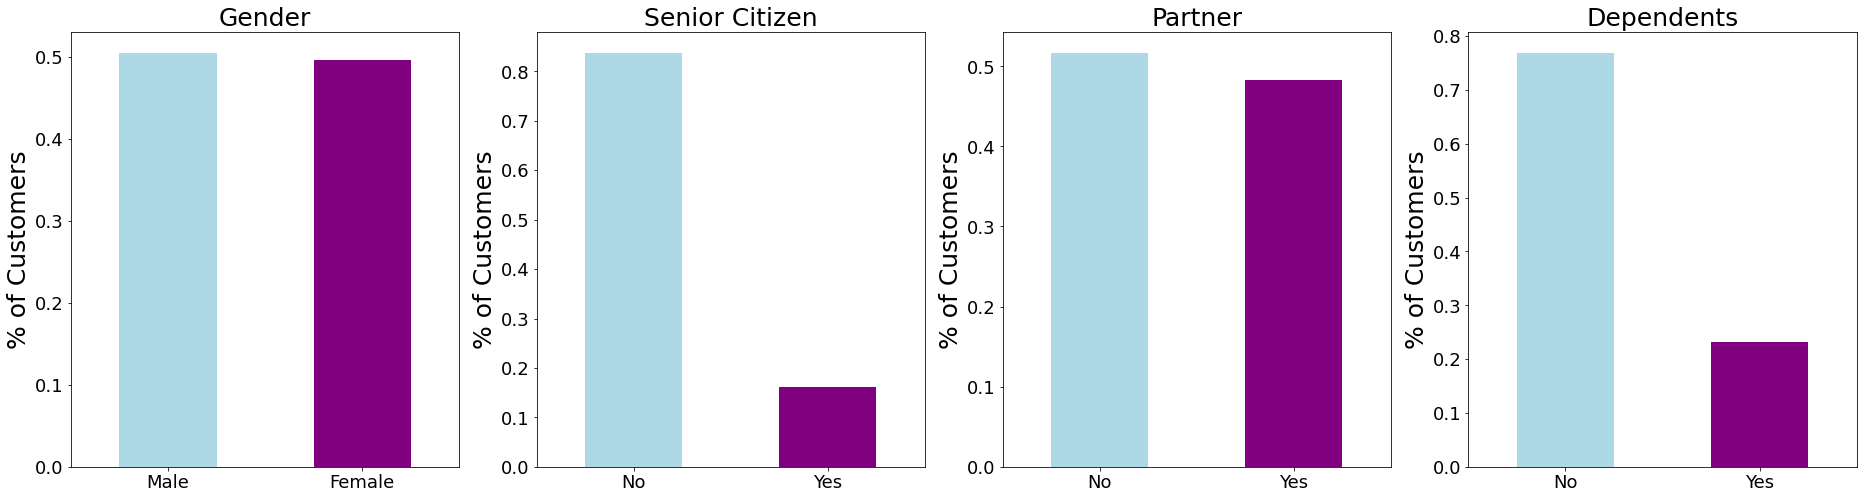

In [143]:
gs = gridspec.GridSpec(1, 4)

fig = plt.figure(figsize=(32, 8))

fig.add_subplot(gs[0, 0]) # row 0, col 0
data['Gender'].value_counts(normalize=True).plot(kind='bar',color=['lightblue','purple'])
plt.title('Gender',fontdict = {'fontsize' : 25})
plt.tick_params(labelsize=18,rotation=0)
plt.ylabel("% of Customers",fontdict = {'fontsize' : 25})

fig.add_subplot(gs[0, 1]) # row 0, col 1
data['Senior Citizen'].value_counts(normalize=True).plot(kind='bar',color=['lightblue','purple'])
plt.title('Senior Citizen',fontdict = {'fontsize' : 25})
plt.tick_params(labelsize=18,rotation=0)
plt.ylabel("% of Customers",fontdict = {'fontsize' : 25})

fig.add_subplot(gs[0, 2]) # row 1, col3
data['Partner'].value_counts(normalize=True).plot(kind='bar',color=['lightblue','purple'])
plt.title('Partner',fontdict = {'fontsize' : 25})
plt.tick_params(labelsize=18,rotation=0)
plt.ylabel("% of Customers",fontdict = {'fontsize' : 25})

fig.add_subplot(gs[0, 3]) # row 1, col3
data['Dependents'].value_counts(normalize=True).plot(kind='bar',color=['lightblue','purple'])
plt.title('Dependents',fontdict = {'fontsize' : 25});
plt.tick_params(labelsize=18,rotation=0)
plt.ylabel("% of Customers",fontdict = {'fontsize' : 25})

### Various Services-  'Phone Service','Multiple Lines', 'Internet Service'

**Phone Service**- A minority of customers uses no phone service

**Multiple Line** - There is a fairly even split of customers using single line and using multiple lines. A small percentage(~10%) has no phone service

**Internet Service** - The customer database dominates with Fiber optic INternet service, follwoed by DSL. A decent amount of customers do not use these telecoms internet service

Text(0, 0.5, '% of Customers')

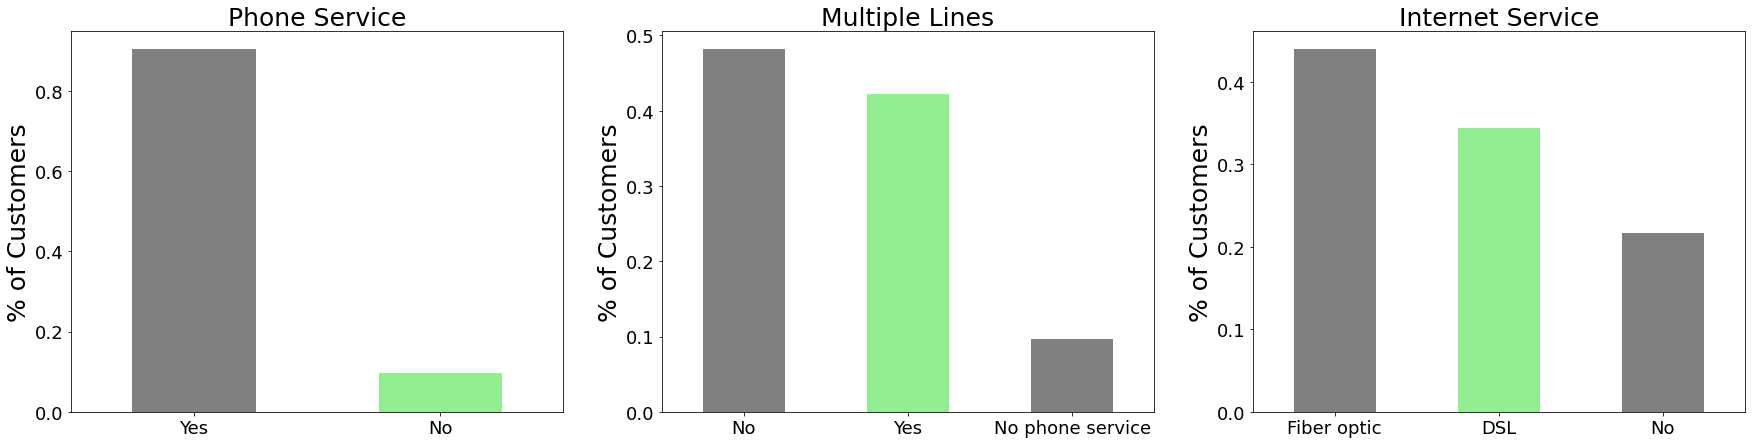

In [144]:
gs = gridspec.GridSpec(1, 3)

fig = plt.figure(figsize=(30, 7))

fig.add_subplot(gs[0, 0]) # row 0, col 0
data['Phone Service'].value_counts(normalize=True).plot(kind='bar',color=['grey','lightgreen'])
plt.title('Phone Service',fontdict = {'fontsize' : 25})
plt.tick_params(labelsize=18,rotation=0)
plt.ylabel("% of Customers",fontdict = {'fontsize' : 25})

fig.add_subplot(gs[0, 1]) # row 0, col 1
data['Multiple Lines'].value_counts(normalize=True).plot(kind='bar',color=['grey','lightgreen'])
plt.title('Multiple Lines',fontdict = {'fontsize' : 25})
plt.tick_params(labelsize=18,rotation=0)
plt.ylabel("% of Customers",fontdict = {'fontsize' : 25})

fig.add_subplot(gs[0, 2]) # row 1, col3
data['Internet Service'].value_counts(normalize=True).plot(kind='bar',color=['grey','lightgreen'])
plt.title('Internet Service',fontdict = {'fontsize' : 25});
plt.tick_params(labelsize=18,rotation=0)
plt.ylabel("% of Customers",fontdict = {'fontsize' : 25})

Almost 50% of customers use no internet service and thus also does not avail none of the online services. Out of the customers with Internet service, majority of the customers do not avail the following services- 'Online Security','Online Backup', 'Device Protection','Tech Support' and a fairly even split for opting 'Streaming TV' and 'Streaming Movies' service

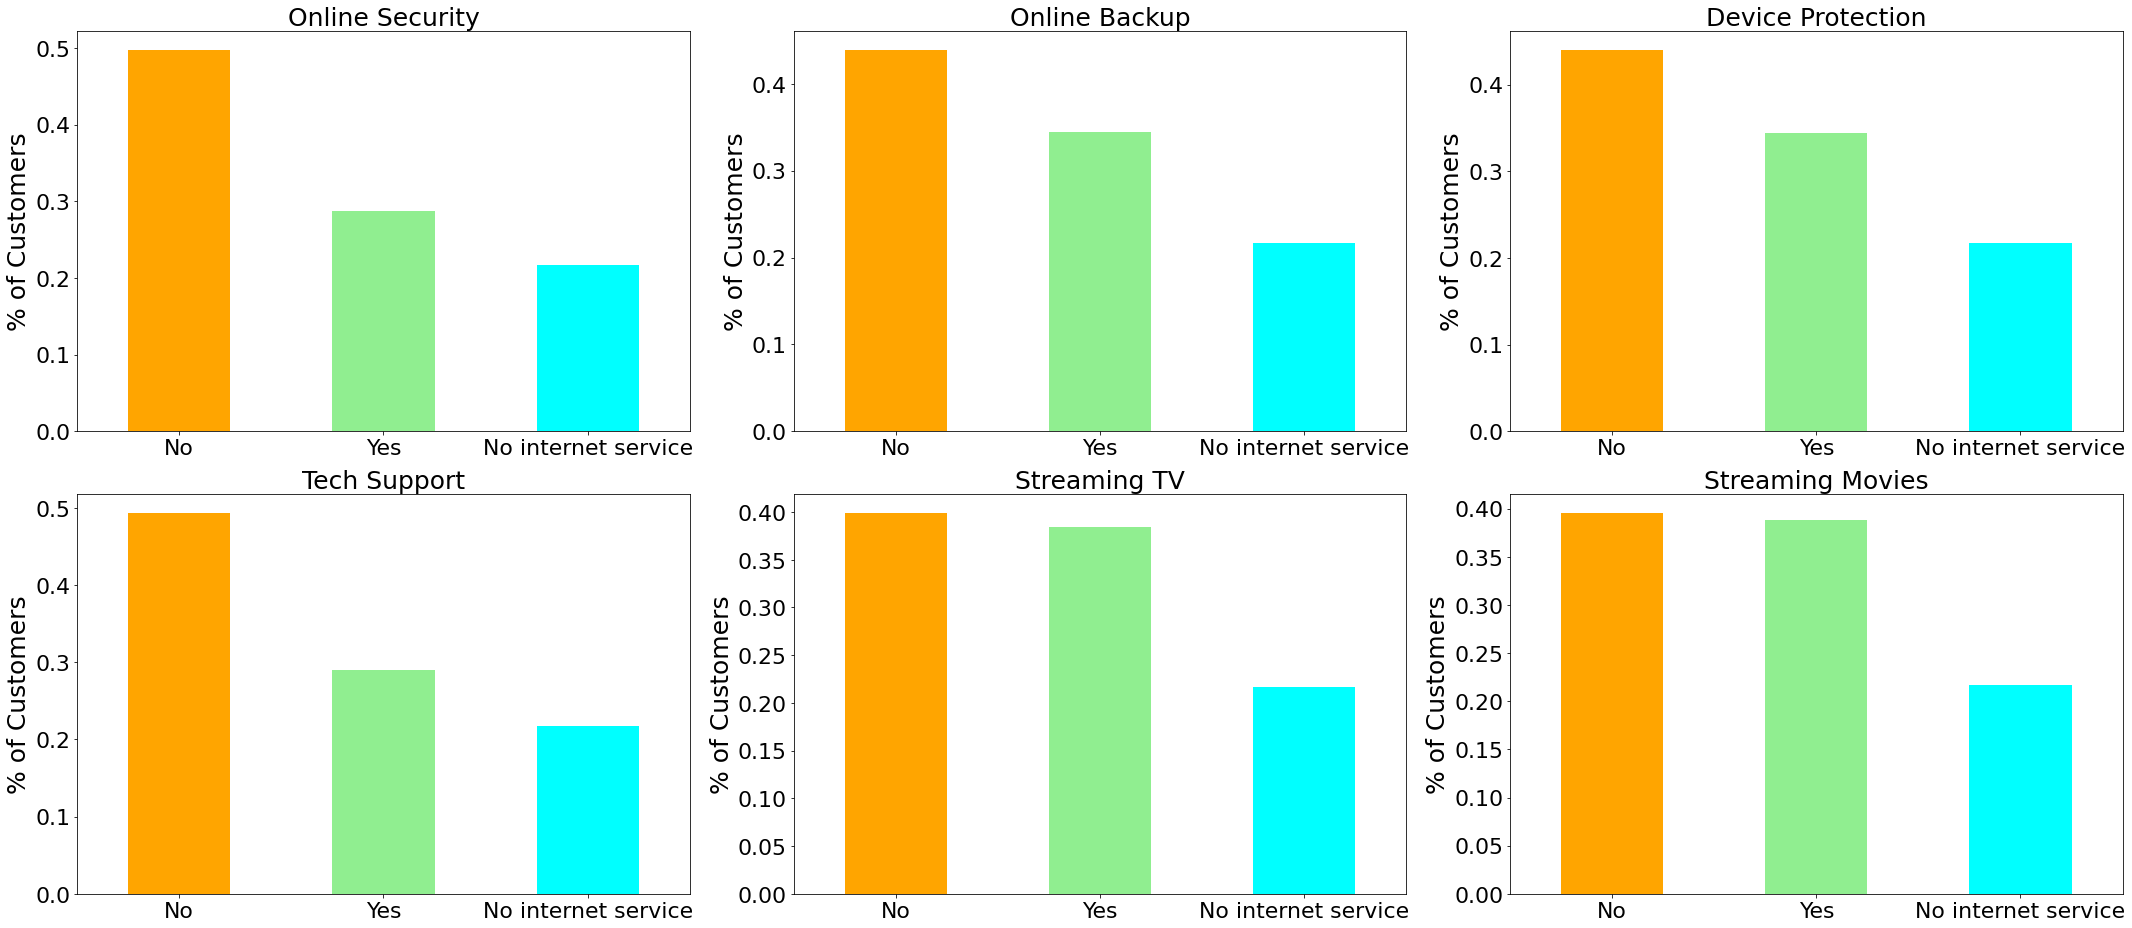

In [145]:
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(30, 13))

fig.add_subplot(gs[0, 0]) # row 0, col 0
data['Online Security'].value_counts(normalize=True).plot(kind='bar',color=['orange','lightgreen','cyan'])
plt.title('Online Security',fontdict = {'fontsize' : 25})
plt.tick_params(labelsize=22,rotation=0)
plt.ylabel("% of Customers",fontdict = {'fontsize' : 25})

fig.add_subplot(gs[0, 1]) # row 0, col 1
data['Online Backup'].value_counts(normalize=True).plot(kind='bar',color=['orange','lightgreen','cyan'])
plt.title('Online Backup',fontdict = {'fontsize' : 25})
plt.tick_params(labelsize=22,rotation=0)
plt.ylabel("% of Customers",fontdict = {'fontsize' : 25})

fig.add_subplot(gs[0, 2]) # row 1, col3
data['Device Protection'].value_counts(normalize=True).plot(kind='bar',color=['orange','lightgreen','cyan'])
plt.title('Device Protection',fontdict = {'fontsize' : 25});
plt.tick_params(labelsize=22,rotation=0)
plt.ylabel("% of Customers",fontdict = {'fontsize' : 25})

fig.add_subplot(gs[1, 0]) # row 1, col3
data['Tech Support'].value_counts(normalize=True).plot(kind='bar',color=['orange','lightgreen','cyan'])
plt.title('Tech Support',fontdict = {'fontsize' : 25})
plt.tick_params(labelsize=22,rotation=0)
plt.ylabel("% of Customers",fontdict = {'fontsize' : 25})

fig.add_subplot(gs[1, 1]) # row 0, col 1
data['Streaming TV'].value_counts(normalize=True).plot(kind='bar',color=['orange','lightgreen','cyan'])
plt.title('Streaming TV',fontdict = {'fontsize' : 25})
plt.tick_params(labelsize=22,rotation=0)
plt.ylabel("% of Customers",fontdict = {'fontsize' : 25})

fig.add_subplot(gs[1, 2]) # row 1, col3
data['Streaming Movies'].value_counts(normalize=True).plot(kind='bar',color=['orange','lightgreen','cyan'])
plt.title('Streaming Movies',fontdict = {'fontsize' : 25})
plt.tick_params(labelsize=22,rotation=0)
plt.ylabel("% of Customers",fontdict = {'fontsize' : 25})

plt.tight_layout()


**Contract** - Almost 55% of the customers pay month to month, follwoing by two-year contracts (20%)

**Paperless Billing** - Around 60% of the customers has opted for Paperless Billings

**Payment Method** - More than 30% of the Customers tend to pay via electronic check more.

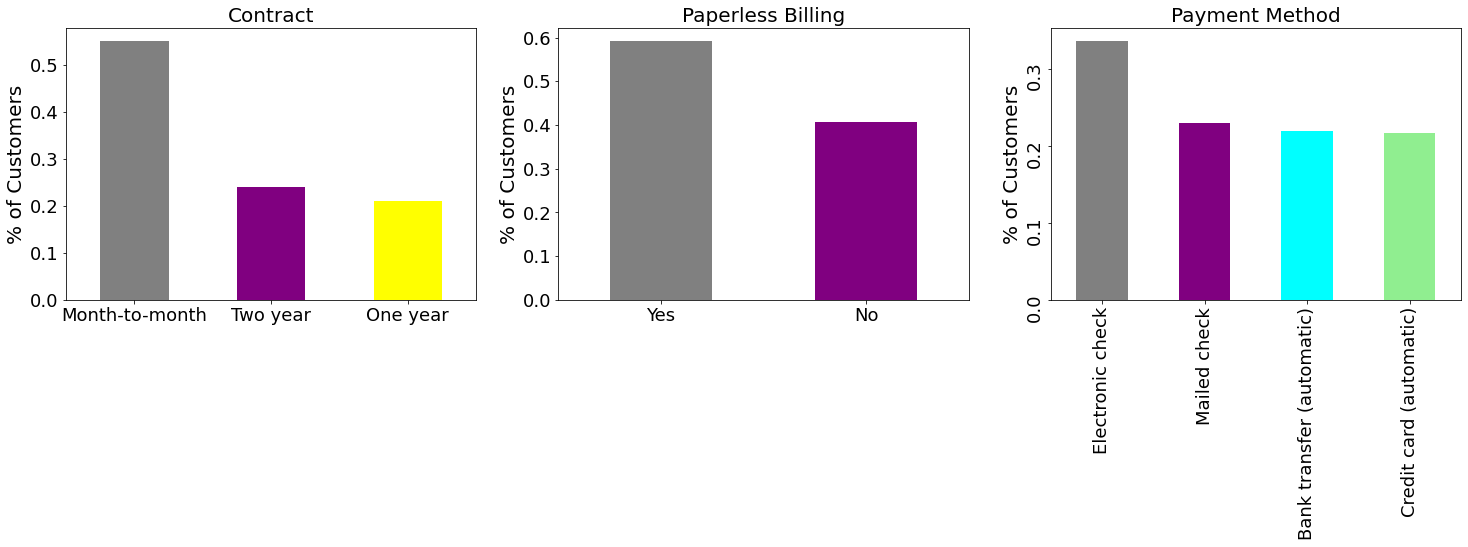

In [146]:
gs = gridspec.GridSpec(1, 3)

fig = plt.figure(figsize=(25, 5))

fig.add_subplot(gs[0, 0]) # row 0, col 0
data['Contract'].value_counts(normalize=True).plot(kind='bar',color=['grey','purple','yellow'])
plt.title('Contract',fontdict = {'fontsize' : 20})
plt.tick_params(labelsize=18,rotation=0)
plt.ylabel("% of Customers",fontdict = {'fontsize' : 20})

fig.add_subplot(gs[0, 1]) # row 0, col 1
data['Paperless Billing'].value_counts(normalize=True).plot(kind='bar',color=['grey','purple'])
plt.title('Paperless Billing',fontdict = {'fontsize' : 20})
plt.tick_params(labelsize=18,rotation=0)
plt.ylabel("% of Customers",fontdict = {'fontsize' : 20})

fig.add_subplot(gs[0, 2]) # row 1, col3
data['Payment Method'].value_counts(normalize=True).plot(kind='bar',color=['grey','purple','cyan','lightgreen'])
plt.title('Payment Method',fontdict = {'fontsize' : 20});
plt.tick_params(labelsize=18,rotation=90)
plt.ylabel("% of Customers",fontdict = {'fontsize' : 20});

### Categorical features and Customer Churn

Insights :

**1. Gender,Phone Service and Churn Rate** - Churn Rate among Male and Female customers are not that different. Both types pf customers have almost same churn rate. We see similar churning rate for customers having Phone service and no Phone Service


**2. Senior/Non-Senior citizens and Churn Rate** - Churn rate is higher for senior citizen customers. Since, the share of senior citizens is about 16% from the total amount of clients, this indicator requires further research with additional data. This indicator is significant and should be taken into account when creating a loyalty program.


**3. Parter, Dependents and Churn Rate** - Having no Partner or dependents, increases the churn rate by more than  for these customers


**4. Having Phone Service,Multiple Lines with Churn Rate** : The rate of churn is almost similar for these two services. 
 
 
**5. Internet Service and Churn Rate** - Clients with Fiber optic internet service is 2.2 times more probable to leave the company than clients with DSL Internet service. The share of clients with Fiber optic internet comprises  44% of the clients base, which is quite significant. Also, an interesting fact is, customers who does not avail any internet services are churning the least .

Several reasons are possible: may be, lower cost substitutes from competitors or the service is not smooth. Business can target these customers with feedback mails.

**6. Online Security ,Tech Support and Churn Rate** - Almost 50% of the Clients do not avail Online security and Tech support, and these customers are almost 3 times more probable to leave, compared to customers who availing these services. Business can target these customers by offering cheap options of security plans and time to time customer support

**7. Online Backup,Device Protection and Churn Rate** - Almost 45% customers prefer no Online Backup and Device protection services, and the churn rate is 1.7 times more than the clients who prefers these services. The business can create programs where they can offer these customers some cheap promotion offers and then monitor their behaviour

**8. Streaming Tv/Movies with Churn rate** - The churn rate for customers who avail the services of streaming TV or Movies is similar.Also, the rate of churn is similar for customers who avail or do not avail these services

**9. Contract Type and Churn Rate** - A majority, almost 55% of the clients have opted Month-To-Month Contract type, but 43% has left the company. This churn rate is 14.3 times more than clients with 2-Year Contract and 4 times more than clients with 1-Yr Contract. This is quite a flag for the business. Without any contract holding them back, customers can easily change mobile operators. This means they have little loyalty to brands, and bad experiences can spread more rapidly. Business can target these month-to-month contractors with some low cost Year-contracts and check the conversion rates

**10. Paperless Billing** - Almost 60% of the customers prefers paperless billing, however, the churning rate is 2 times more than customers who prefer Paper Billing. Business can provide Paperless Billing customers with the option of converting to Paper Billings and get feedback

**11. Payment method** - 30% of the client base has opted for payment in Electronic Check payments, however almost 45% of them has churned.  Electronic-Check Payment customers can be offered with options of automatic payment modes such as Credit Card payments or Bank Transfer which has much lower churning rate

    

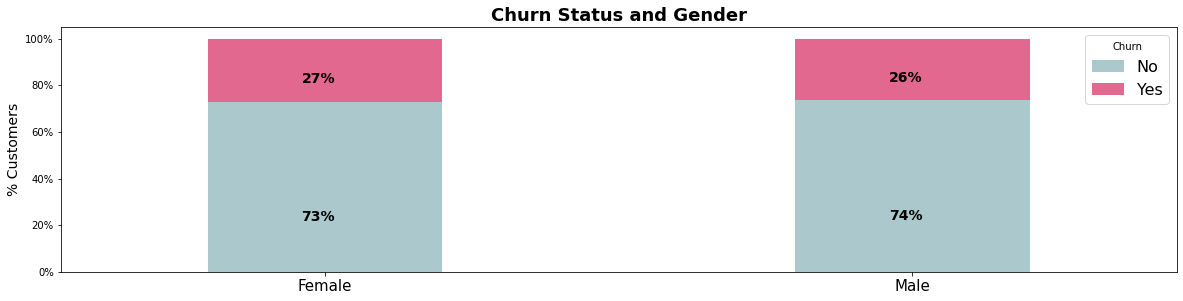

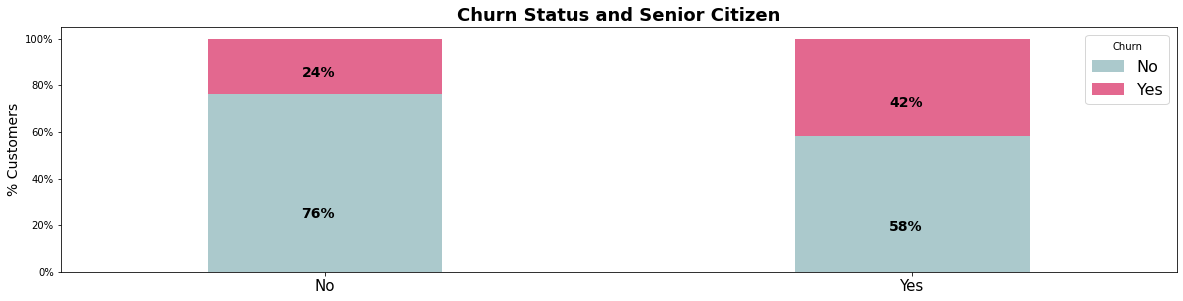

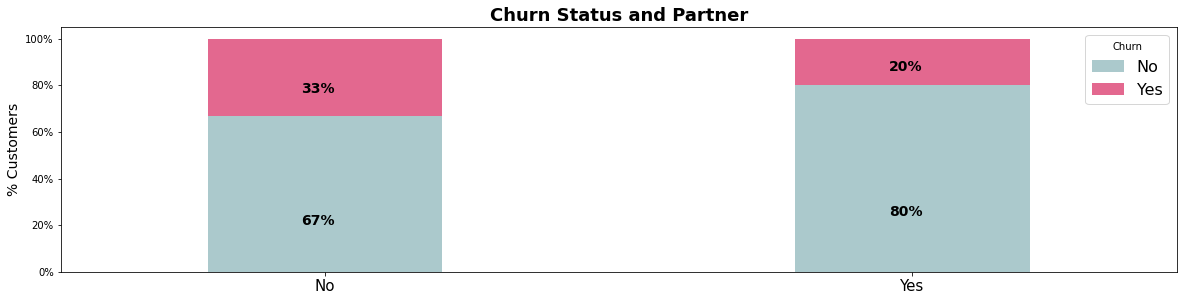

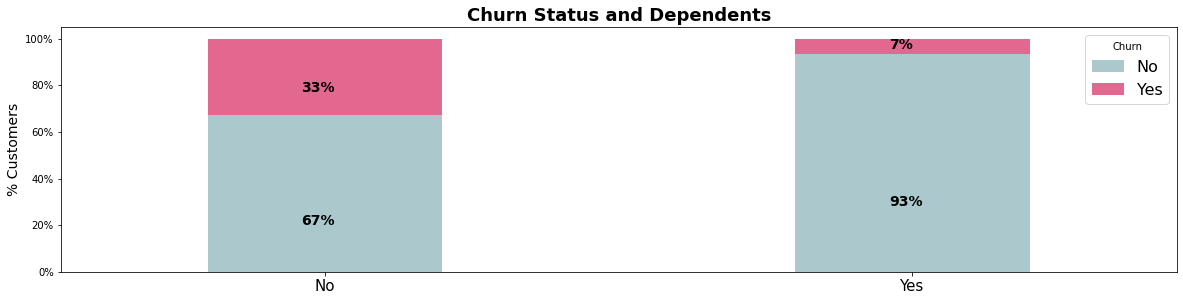

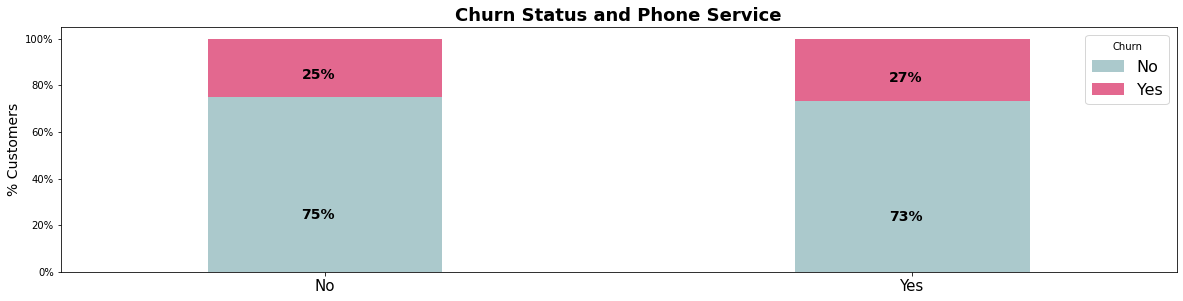

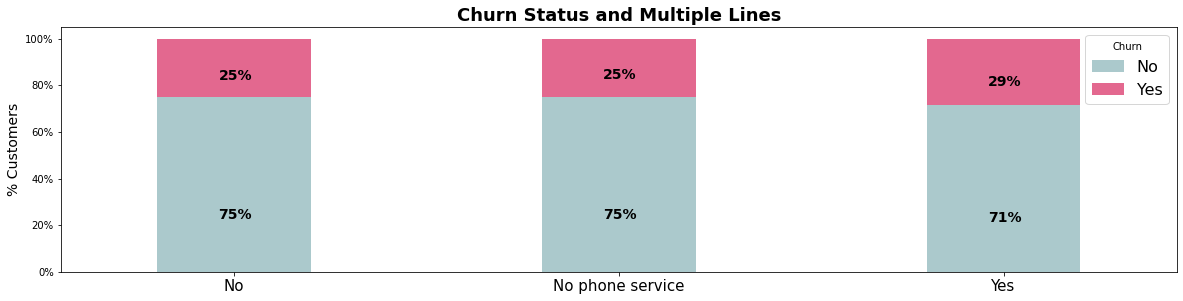

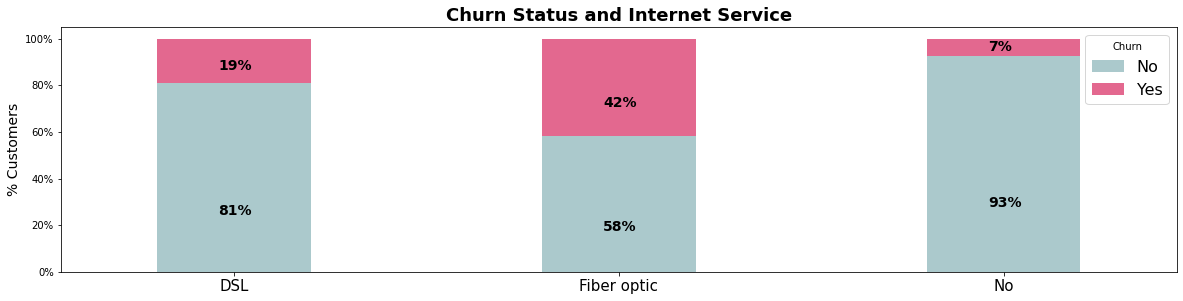

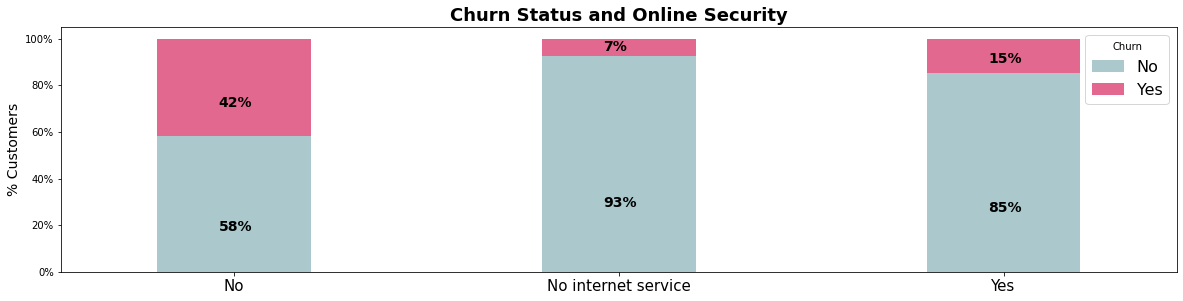

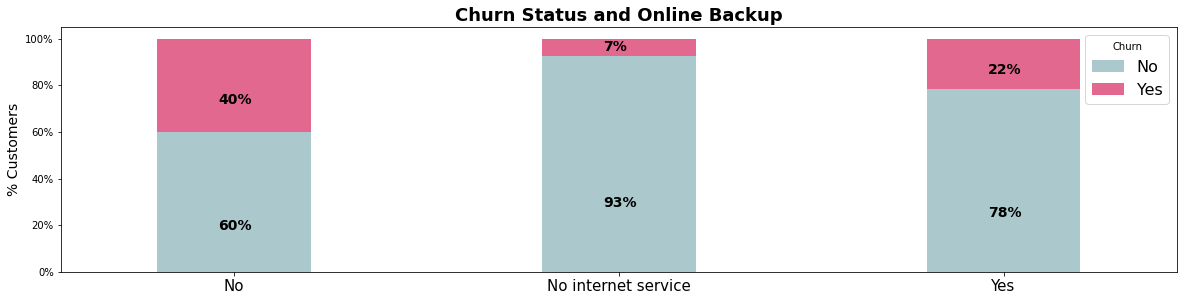

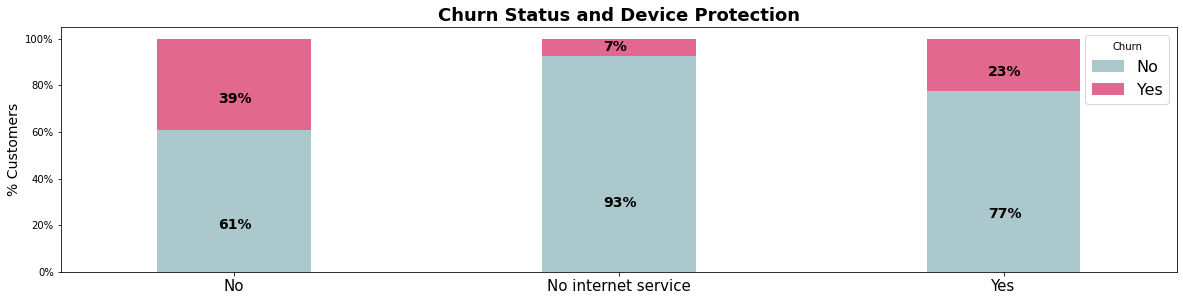

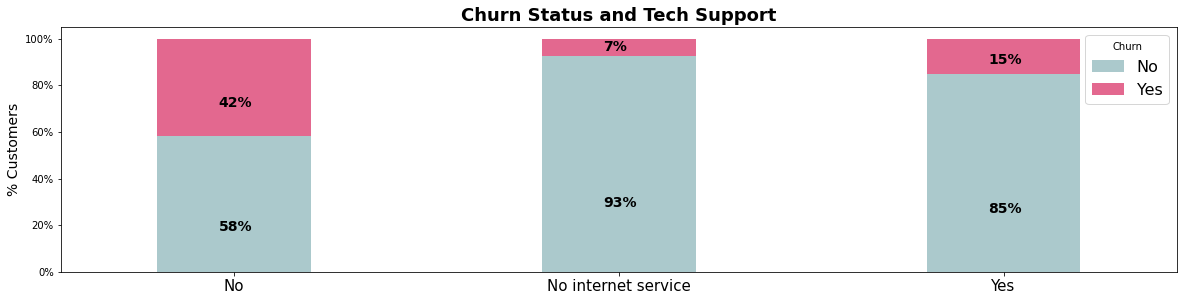

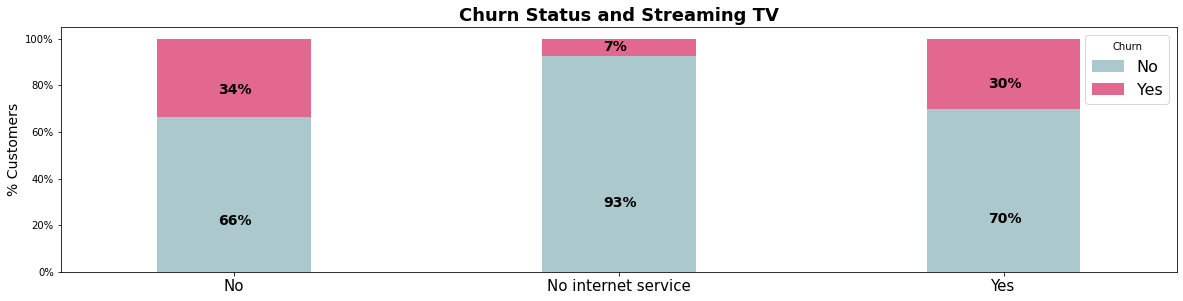

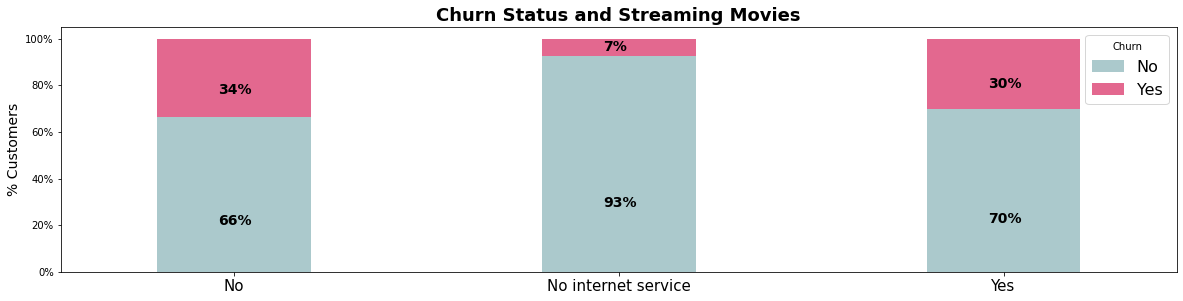

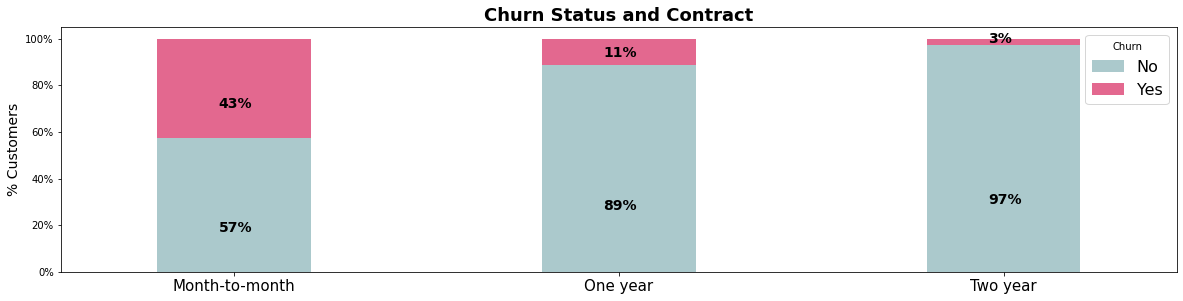

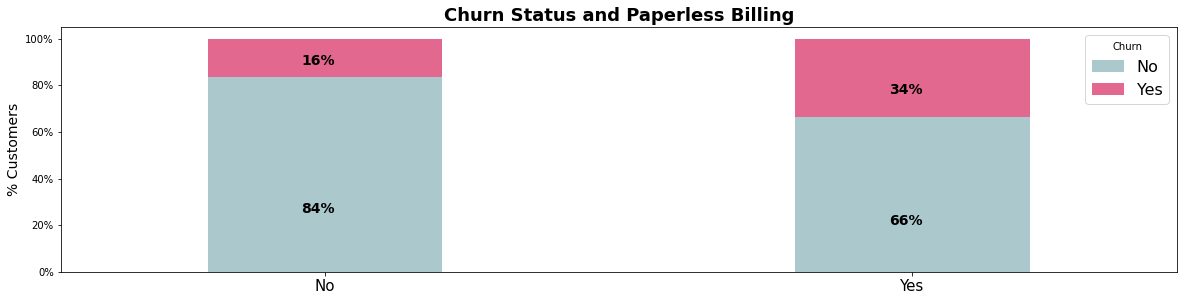

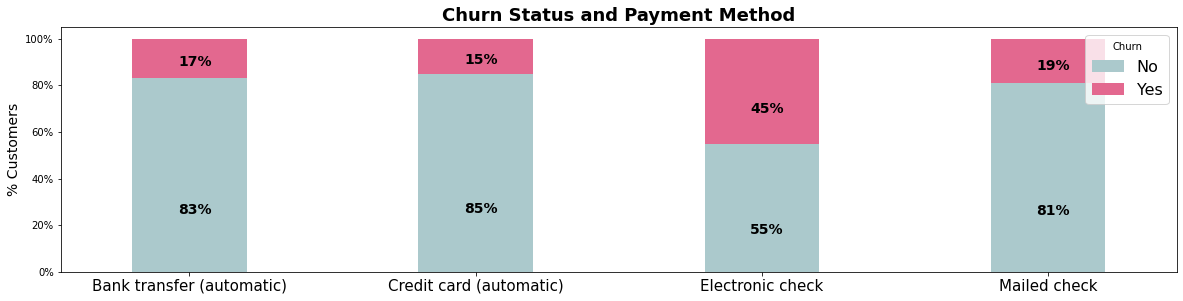

In [147]:
for i in categorical_vars:
#     colors = ['#bfee90','#f8b414']  # green # orange
    colors=['#abc9cc','#e3688f']
    temp_dataset = data.groupby([i,'Churn Label']).size().unstack()

    ax = (temp_dataset.T*100.0 / temp_dataset.T.sum()).T.plot(kind='bar', width = 0.4,stacked = True,rot = 0,figsize = (20,4.5),
                                                                    color = colors)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.legend(loc='upper right',prop={'size':16},title = 'Churn',fontsize =15)
    ax.set_ylabel('% Customers',size = 14)
    ax.set_xlabel('')
    ax.set_title("Churn Status and {}".format(i),size = 18,weight='bold')
    ax.xaxis.label.set_size(15)
    plt.tick_params(axis='x',labelsize=15)

    # Code to add the data labels on the stacked bar chart
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate('{:.0f}%'.format(height), (p.get_x()+.4*width, p.get_y()+.3*height),color = 'black',weight = 'bold',
                    size = 14)

#### Contract and Tenure 

It is seen, with Month-to-month contract, for the majority of the clients, the tenure duration is quite low. But if the contract type is 2 years, majority of the customers have a longer tenure. 

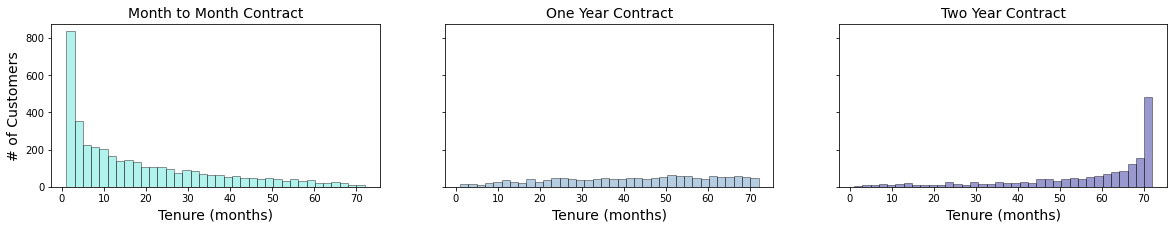

In [148]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,3))

ax = sns.distplot(data[data['Contract']=='Month-to-month']['Tenure Months'], hist=True, kde=False,bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4},ax=ax1)
ax.set_ylabel('# of Customers',size = 14)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('Month to Month Contract',size = 14)

ax = sns.distplot(data[data['Contract']=='One year']['Tenure Months'],hist=True, kde=False,bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4},ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(data[data['Contract']=='Two year']['Tenure Months'],hist=True, kde=False,bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4},ax=ax3)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('Two Year Contract',size = 14);